# Stock Trading on AMX and MSFT

#### Adjust date range, align data, import multiple stock


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Parameters
start_date ='2012-01-07'
end_date = '2012-12-31'

stock_index = None

In [7]:
amx = pd.read_table('Stocks/axp.us.txt',sep=',',index_col='Date',parse_dates=True)
msft = pd.read_table('Stocks/msft.us.txt',sep=',',index_col='Date',parse_dates=True)


## Import dataset from sp500,nasdaq, spy(ETFs that follow sp500)
sp500 = pd.DataFrame.from_csv('Stocks/SP500.csv',index_col='Date',parse_dates=True)
nasdaq = pd.DataFrame.from_csv('Stocks/nasdaq_composite.csv',index_col='Date',parse_dates=True)
spy = pd.DataFrame.from_csv('Stocks/SPY.csv',index_col='Date',parse_dates=True)

In [8]:
amx = amx.loc[start_date: end_date]
msft = msft.loc[start_date: end_date]

In [9]:
merged_df_amx = pd.merge(amx,sp500,how='inner', left_index=True, right_index=True)
merged_df_msft = pd.merge(msft,sp500,how='inner', left_index=True, right_index=True)

##### Here we will use spy opening price from today minus yesterday opening price
##### lag shows the price difference from the day before. 

In [10]:
df= pd.DataFrame(index=merged_df_amx.index)
df['spy']=spy['Open'].pct_change()
df['spy_lag']=df['spy'].shift(1)
df['sp500']=sp500['Open'].pct_change()
df['sp500_lag']=df['spy'].shift(1)
df['nasdaq']=nasdaq['Open'].pct_change()
df['nasdaq_lag']=df['nasdaq'].shift(1)
df['amx_diff'] = merged_df_amx['Close_x'].shift(-1)-merged_df_amx['Close_x']
df['Price']=merged_df_amx['Close_x']

In [11]:
df1= pd.DataFrame(index=merged_df_amx.index)
df1['spy']=spy['Open'].shift(-1)-spy['Open']
df1['spy_lag']=df1['spy'].shift(1)
df1['sp500']=sp500['Open'].shift(-1)-sp500['Open']
df1['sp500_lag']=df1['spy'].shift(1)
df1['nasdaq']=nasdaq['Open'].shift(-1)-nasdaq['Open']
df1['nasdaq_lag']=df1['nasdaq'].shift(1)
df1['msft_diff'] = merged_df_msft['Close_x'].shift(-1)-merged_df_msft['Close_x']
df1['Price']=merged_df_msft['Close_x']

### Buy and Hold strategy

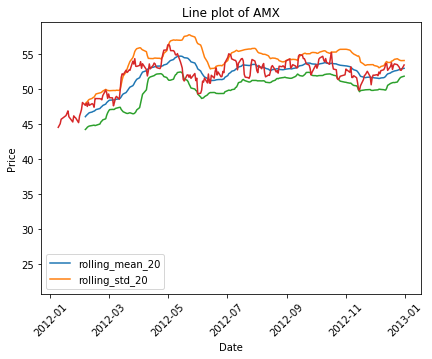

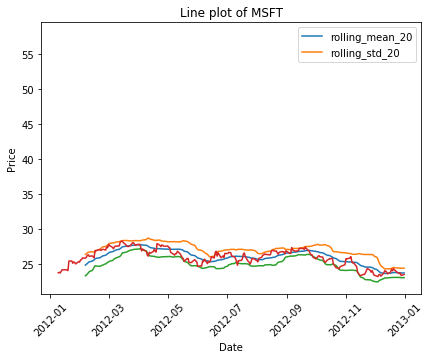

In [12]:
# AMX rolling mean
rolling_mean_20_amx = df['Price'].rolling(20).mean()
rolling_std_20_amx = df['Price'].rolling(20).std()
upper_band_amx = rolling_mean_20_amx + 2*rolling_std_20_amx
lower_band_amx = rolling_mean_20_amx- 2 *rolling_std_20_amx

# MSFT rolling mean
rolling_mean_20_msft = df1['Price'].rolling(20).mean()
rolling_std_20_msft = df1['Price'].rolling(20).std()
upper_band_msft = rolling_mean_20_msft + 2*rolling_std_20_msft
lower_band_msft = rolling_mean_20_msft- 2 *rolling_std_20_msft

plt.figure(figsize=(15,5))
ax1= plt.subplot(1,2,1)
sns.lineplot(x=df.index,y= rolling_mean_20_amx,label='rolling_mean_20')
sns.lineplot(x=df.index,y= upper_band_amx,label='rolling_std_20')
sns.lineplot(x=df.index,y= lower_band_amx)
sns.lineplot(x=df.index,y= df['Price'])
plt.xticks(rotation=45)
plt.legend()
plt.title('Line plot of AMX')


plt.figure(figsize=(15,5))
ax2 = plt.subplot(1,2,2,sharey = ax1)
sns.lineplot(x=df1.index,y= rolling_mean_20_msft,label='rolling_mean_20')
sns.lineplot(x=df1.index,y= upper_band_msft,label='rolling_std_20')
sns.lineplot(x=df1.index,y= lower_band_msft)
sns.lineplot(x=df1.index,y= df1['Price'])
plt.xticks(rotation=45)
plt.legend()
plt.title('Line plot of MSFT')
plt.show()

In [13]:
df['Return'] = df['amx_diff']/df['Price']
df1['Return'] = df1['msft_diff']/df1['Price']

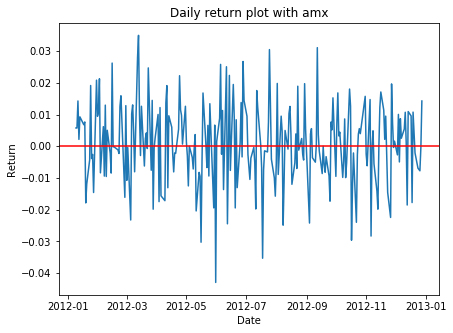

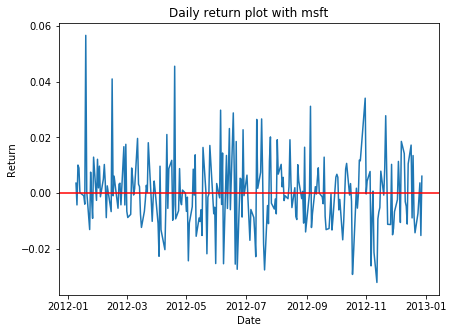

In [14]:
## Plotting the daily return, it is very noisy. 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=df.index,y=df['Return'])
plt.axhline(y=0, color='red')
plt.title('Daily return plot with amx')

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.lineplot(x=df1.index,y=df1['Return'])
plt.axhline(y=0, color='red')
plt.title('Daily return plot with msft')
plt.show()

In [15]:
# Amx 
df['Direction'] = [1 if df['amx_diff'].loc[ei] > 0 else 0 for ei in df.index ]
# MSFT
df1['Direction'] = [1 if df1['msft_diff'].loc[ei] > 0 else 0 for ei in df1.index ]

In [16]:
# Amx 
df['ma10'] = df['Price'].rolling(5).mean()
df['ma50'] = df['Price'].rolling(20).mean()
# MSFT
df1['ma10'] = df1['Price'].rolling(5).mean()
df1['ma50'] = df1['Price'].rolling(20).mean()

In [17]:
# Amx 
df['Shares'] = [1 if df.loc[ei, 'ma10']>df.loc[ei, 'ma50'] else 0 for ei in df.index]
# MSFT
df1['Shares'] = [1 if df1.loc[ei, 'ma10']>df1.loc[ei, 'ma50'] else 0 for ei in df1.index]

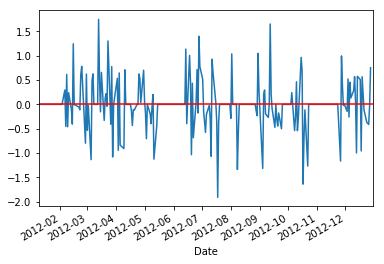

In [18]:
# Amx 
df['Price1'] = df['Price'].shift(-1)
df['Profit_buyhold'] = [df.loc[ei, 'Price1'] - df.loc[ei, 'Price'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit_buyhold'].plot()
plt.axhline(y=0, color='red')



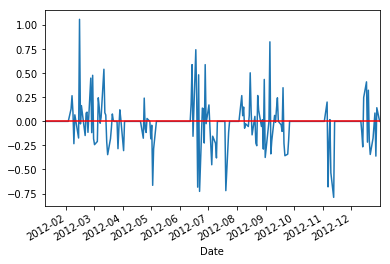

In [19]:
# MSFT
df1['Price1'] = df1['Price'].shift(-1)
df1['Profit_buyhold'] = [df1.loc[ei, 'Price1'] - df1.loc[ei, 'Price'] if df1.loc[ei, 'Shares']==1 else 0 for ei in df1.index]
df1['Profit_buyhold'].plot()
plt.axhline(y=0, color='red')

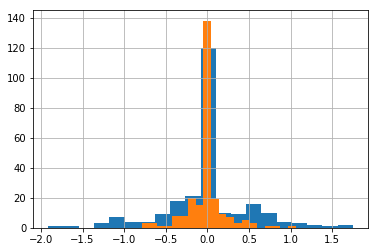

In [20]:
## Plot histogram to compare both stocks 
df['Profit_buyhold'].hist(bins=20)
df1['Profit_buyhold'].hist(bins=20)


In [21]:
df['wealth_buyhold'] = df['Profit_buyhold'].cumsum()

df1['wealth_buyhold'] = df1['Profit_buyhold'].cumsum()

Text(0.5, 1.0, 'Total money you win from is -0.06400000000002137')

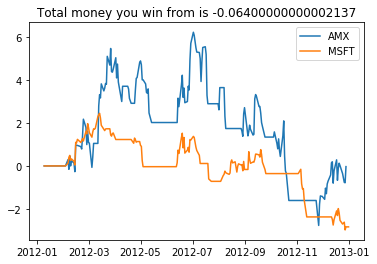

In [22]:
plt.figure()
plt.plot(df['wealth_buyhold'],label = 'AMX')
plt.plot(df1['wealth_buyhold'],label = 'MSFT')
plt.legend()
plt.title('Total money you win from is {}'.format(df.loc[df.index[-2], 'wealth_buyhold']+df.loc[df1.index[-2], 'wealth_buyhold'] ))

In [23]:
### Lossing strategy. Let us see the signal strategy

## Signal strategy

In [24]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [25]:
df.columns

Index(['spy', 'spy_lag', 'sp500', 'sp500_lag', 'nasdaq', 'nasdaq_lag',
       'amx_diff', 'Price', 'Return', 'Direction', 'ma10', 'ma50', 'Shares',
       'Price1', 'Profit_buyhold', 'wealth_buyhold'],
      dtype='object')

In [26]:
import statsmodels.formula.api as smf

In [27]:
df.iloc[:int(df.shape[0]*0.8), :]

,spy,spy_lag,sp500,sp500_lag,nasdaq,nasdaq_lag,amx_diff,Price,Return,Direction,ma10,ma50,Shares,Price1,Profit_buyhold,wealth_buyhold
Date,,,,,,,,,,,,,,,,
2012-02-06,-0.000149,0.009568,0.013655,0.009568,0.001236,0.012210,0.295,47.698,0.006185,1,47.1330,46.07575,1,47.993,0.295,0.295
2012-02-07,0.001418,-0.000149,0.000007,-0.000149,0.001172,0.001236,-0.452,47.993,-0.009418,0,47.4986,46.24785,1,47.541,-0.452,-0.157
2012-02-08,0.005143,0.001418,0.002016,0.001418,0.003688,0.001172,0.617,47.541,0.012978,1,47.6866,46.38450,1,48.158,0.617,0.460
2012-02-09,0.004078,0.005143,0.002175,0.005143,0.005460,0.003688,-0.460,48.158,-0.009552,0,47.8984,46.53910,1,47.698,-0.460,0.000
2012-02-10,-0.009231,0.004078,0.000919,0.004078,-0.007001,0.005460,0.240,47.698,0.005032,1,47.8176,46.63850,1,47.938,0.240,0.240
2012-02-13,0.008646,-0.009231,-0.006032,-0.009231,0.008343,-0.007001,-0.104,47.938,-0.002169,0,47.8656,46.74495,1,47.834,-0.104,0.136
2012-02-14,-0.002365,0.008646,0.006135,0.008646,-0.001541,0.008343,-0.405,47.834,-0.008467,0,47.8338,46.82495,1,47.429,-0.405,-0.269
2012-02-15,0.004667,-0.002365,-0.000577,-0.002365,0.007434,-0.001541,1.245,47.429,0.026250,1,47.8114,46.86900,1,48.674,1.245,0.976
2012-02-16,-0.007815,0.004667,-0.005857,0.004667,-0.009428,0.007434,-0.009,48.674,-0.000185,0,47.9146,46.95745,1,48.665,-0.009,0.967


In [28]:
Train_y = df.iloc[:int(df.shape[0]*0.8), :]['amx_diff']
Train_x = df.iloc[:int(df.shape[0]*0.8), :][['spy', 'spy_lag', 'sp500', 'sp500_lag', 'nasdaq', 'nasdaq_lag']]
Test = df.iloc[int(df.shape[0]*0.8)+1:, :]

Train1 = df1.iloc[:int(df.shape[0]*0.8), :]
Test1 = df1.iloc[int(df.shape[0]*0.8)+1:, :]

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(Train_x,Train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
Train_x['PredictedY'] = lm.predict(Train_x)


In [37]:
plt.scatter(Train['amx_diff'], Train['PredictedY'])
plt.scatter(Train1['msft_diff'], Train1['PredictedY'])

NameError: name 'Train' is not defined

In [ ]:
# correlation glance between msft and amx 
plt.scatter(Train['amx_diff'], Train1['msft_diff'])

In [32]:
# Train on AMX
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit_signal'] = Train['amx_diff'] * Train['Order']

Train['Wealth_signal'] = Train['Profit_signal'].cumsum()
print('Total profit made in Train: ', Train['Profit_signal'].sum())

# Train on MSFT
Train1['Order'] = [1 if sig>0 else -1 for sig in Train1['PredictedY']]
Train1['Profit_signal'] = Train1['msft_diff'] * Train1['Order']

Train1['Wealth_signal'] = Train1['Profit_signal'].cumsum()
print('Total profit made in Train: ', Train1['Profit_signal'].sum())


NameError: name 'Train' is not defined

In [33]:
Train['Profit_signal'].hist(bins=20,label= 'AMX')
Train1['Profit_signal'].hist(bins=20,label='MSFT')
plt.title('Daily Return using signal strategy')
plt.legend()

NameError: name 'Train' is not defined

##### AMX has a higher standard deviation compared to MSFT. Flatter tails mean more potential outliers on each end. We expect that on average AMX could be more risky.

In [96]:
# Test on AMX 
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit_signal'] = Test['amx_diff'] * Test['Order']

Test['Wealth_signal'] = Test['Profit_signal'].cumsum()
print('Total profit made in Test on AMX: ', Test['Profit_signal'].sum())

# Test on MSFT 
Test1['Order'] = [1 if sig>0 else -1 for sig in Test1['PredictedY']]
Test1['Profit_signal'] = Test1['msft_diff'] * Test1['Order']

Test1['Wealth_signal'] = Test1['Profit_signal'].cumsum()
print('Total profit made in Test on MSFT: ', Test1['Profit_signal'].sum())

Total profit made in Test on AMX:  5.858000000000004
Total profit made in Test on MSFT:  2.5800000000000054


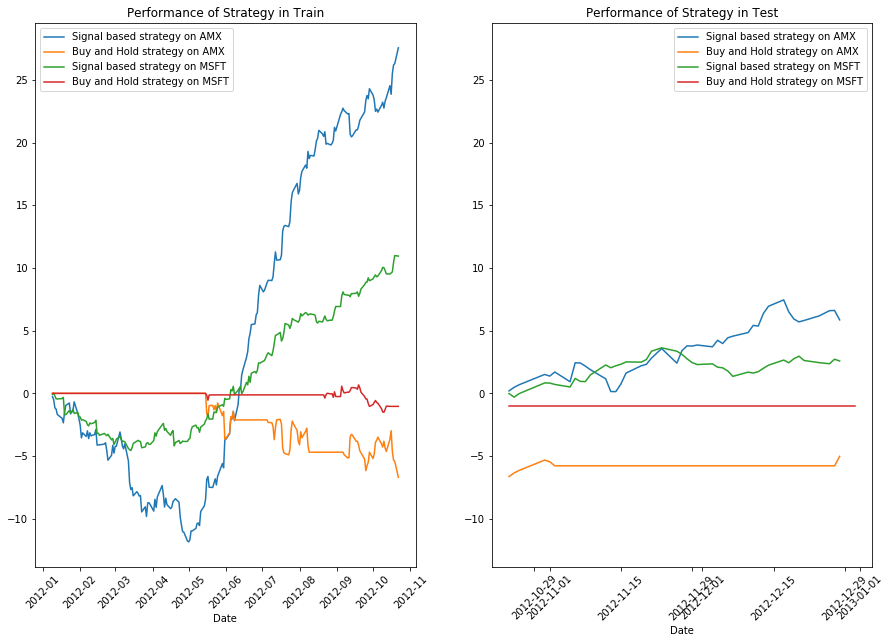

In [98]:
plt.figure(figsize=(15, 10))
ax1 =plt.subplot(1,2,1)
plt.title('Performance of Strategy in Train')
# AMX performance
sns.lineplot(x= Train.index, y= Train['Wealth_signal'].values, label='Signal based strategy on AMX')
sns.lineplot(x= Train.index,y=Train['wealth_buyhold'].values, label='Buy and Hold strategy on AMX')
# MSFT performance 
sns.lineplot(x= Train1.index, y= Train1['Wealth_signal'].values, label='Signal based strategy on MSFT')
sns.lineplot(x= Train1.index,y=Train1['wealth_buyhold'].values, label='Buy and Hold strategy on MSFT')
plt.xticks(rotation=45)
plt.legend()


ax2 =plt.subplot(1,2,2,sharey=ax1)
plt.title('Performance of Strategy in Test')
# AMX performance
sns.lineplot(x= Test.index, y= Test['Wealth_signal'].values, label='Signal based strategy on AMX')
sns.lineplot(x= Test.index,y=Test['wealth_buyhold'].values, label='Buy and Hold strategy on AMX')
# MSFT performance 

sns.lineplot(x= Test1.index, y= Test1['Wealth_signal'].values, label='Signal based strategy on MSFT')
sns.lineplot(x= Test1.index,y=Test1['wealth_buyhold'].values, label='Buy and Hold strategy on MSFT')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Model Evaluation

In [127]:
np.corrcoef(Train['Return'],Train['Wealth_signal'])[0,1]

-0.07078671722433572

In [155]:
Train['Wealth_signal'] = Train['Wealth_signal'] + Train.loc[Train.index[0], 'Price']
Test['Wealth_signal'] = Test['Wealth_signal'] + Test.loc[Test.index[0], 'Price']

## Sharpe Ratio

In [156]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth_signal']) - np.log(Train['Wealth_signal'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.40905070323366416
Yearly Sharpe Ratio is  6.4934786062341585


In [157]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth_signal']) - np.log(Test['Wealth_signal'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.20117039203939863
Yearly Sharpe Ratio is  3.1934809709136993


##### Maximum Drawdown tells us that the maximum drop from previous peak 

In [158]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth_signal'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth_signal'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.05722895868146331


In [159]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth_signal'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth_signal'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.04339504395399648
